
# Проект e-commerce: вариант 1
### студент: Панина Ольга
#### почта: olya.panina2001@yandex.ru

In [145]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

Так как ссылки с Яндекс.Диска не являются рабочими (превышен лимит на скачивание), я залила данные в гитхаб

In [2]:
olist_customers = pd.read_csv('https://raw.githubusercontent.com/pandaolyaa/first_project/main/olist_customers_dataset.csv')
olist_orders = pd.read_csv('https://raw.githubusercontent.com/pandaolyaa/first_project/main/olist_orders_dataset.csv')
olist_order_items = pd.read_csv('https://raw.githubusercontent.com/pandaolyaa/first_project/main/olist_order_items_dataset.csv')

## Предобработка данных
Посмотрим на таблицы и как они связаны. Посмотрим на размер таблиц, проверим на наличие дубликатов.
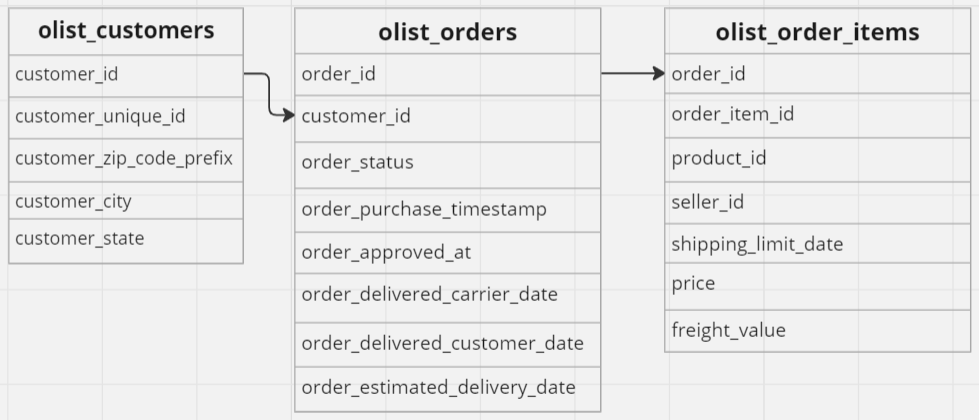


In [3]:
olist_customers.shape

(99441, 5)

In [4]:
olist_customers.duplicated().sum()

0

In [5]:
olist_orders.shape

(99441, 8)

In [6]:
olist_orders.duplicated().sum()

0

In [7]:
olist_order_items.shape

(112650, 7)

In [8]:
olist_order_items.duplicated().sum()

0

#### Посмотрим на типы данных в таблицах

In [9]:
olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


В таблицах **olist_orders** и **olist_order_items** колонки с датами имеют тип object.

#### Проверим таблицы на пропуски

In [12]:
olist_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
olist_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
olist_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Столбцы customer_id в таблицах olist_customers и olist_orders соотносятся "1 к 1". Проверим это ниже:

In [15]:
olist_customers.customer_id.value_counts().reset_index().sort_values('index')

,index,customer_id
33809,00012a2ce6f8dcda20d059ce98491703,1
8059,000161a058600d5901f007fab4c27140,1
48824,0001fd6190edaaf884bcaf3d49edf079,1
58865,0002414f95344307404f0ace7a26f1d5,1
4795,000379cdec625522490c315e70c7a9fb,1
...,...,...
82786,fffecc9f79fd8c764f843e9951b11341,1
21240,fffeda5b6d849fbd39689bb92087f431,1
91177,ffff42319e9b2d713724ae527742af25,1
77437,ffffa3172527f765de70084a7e53aae8,1


In [16]:
olist_orders.customer_id.value_counts().reset_index().sort_values('index')

,index,customer_id
33872,00012a2ce6f8dcda20d059ce98491703,1
87352,000161a058600d5901f007fab4c27140,1
48816,0001fd6190edaaf884bcaf3d49edf079,1
70676,0002414f95344307404f0ace7a26f1d5,1
4808,000379cdec625522490c315e70c7a9fb,1
...,...,...
83914,fffecc9f79fd8c764f843e9951b11341,1
19154,fffeda5b6d849fbd39689bb92087f431,1
501,ffff42319e9b2d713724ae527742af25,1
61943,ffffa3172527f765de70084a7e53aae8,1


В таблице olist_customers значения customer_unique_id и customer_id имеют отношение "один ко многим". То есть каждому уникальному id пользователя (customer_unique_id) соответствует 1 или более позаказных номеров (customer_id). Так же проверим это ниже:

In [17]:
olist_customers.groupby('customer_unique_id', as_index=False) \
                .agg({'customer_id':'count'}) \
                .sort_values('customer_id', ascending=False) 

,customer_unique_id,customer_id
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
32508,5657dfebff5868c4dc7e8355fea865c4,1
32507,5657596addb4d7b07b32cd330614bdf8,1
32506,5656eb169546146caeab56c3ffc3d268,1
32505,5656a8fabc8629ff96b2bc14f8c09a27,1


## №1 Сколько у нас пользователей, которые совершили покупку только один раз?

В соответствии с Постановлением Правительства РФ от 27.09.2007 N 612 (ред. от 16.05.2020) "Об утверждении Правил продажи товаров дистанционным способом", договор считается заключенным с момента выдачи продавцом покупателю кассового или товарного чека либо иного документа, подтверждающего оплату товара, или с момента получения продавцом сообщения о намерении покупателя приобрести товар.

Поэтому совершенной покупкой будем считать ту, которая прошла все этапы до **processing**, не была отменена или не стала недоступной и имеет дату оплаты в **order_approved_at** (таблица **olist_orders**). То есть, будем считать факт покупки не по завершенной доставке, а по оплате товара. Нам подходят этапы **processing, shipped, delivered**.

Смерджим таблицы **olist_customers** и **olist_orders** по ключу **customer_id**, чтобы получить количество покупок для каждого покупателя:

In [18]:
customers_orders = olist_customers.merge(olist_orders, how='left', on='customer_id')

In [19]:
customers_orders.order_approved_at = customers_orders.order_approved_at.astype('datetime64')

In [20]:
statuses = ['processing', 'shipped', 'delivered']

In [21]:
customers_orders.loc[customers_orders.order_approved_at.notna()] \
                .query('order_status in @statuses') \
                .groupby('customer_unique_id', as_index=False) \
                .agg({'order_id':'count'}) \
                .sort_values('order_id', ascending=False) \
                .query('order_id == 1') \
                .count()


customer_unique_id    91802
order_id              91802
dtype: int64

Ответ: 91802 клиентов совершили только 1 покупку.

## №2 Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 


Нужно посчитать сколько заказов, которые находятся на этапах canceled или unavailable.

Для начала переведем столбцы с  датами в подходящий формат:

In [22]:
customers_orders.order_delivered_carrier_date = customers_orders.order_delivered_carrier_date.astype('datetime64')

customers_orders.order_delivered_customer_date = customers_orders.order_delivered_customer_date.astype('datetime64')

customers_orders.order_estimated_delivery_date = customers_orders.order_estimated_delivery_date.astype('datetime64')

customers_orders.order_purchase_timestamp = customers_orders.order_purchase_timestamp.astype('datetime64')

Отфильтруем заказы со статусами unavailable, canceled

In [23]:
not_delivered = customers_orders.query('order_status == "unavailable" or order_status == "canceled"')

Для расчета среднемесячной метрики, приведем дату создания заказа к формату, где есть год и месяц (убираем день)

In [24]:
not_delivered['purchase_by_month'] = not_delivered['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m'))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Затем выполним следующие шаги:
    - сгруппируем по месяцам и статусам,
    - посчитаем их количество


In [25]:
not_delivered.groupby(['purchase_by_month', 'order_status'], as_index=False) \
    .agg({'order_id':'count'}) \
    .pivot()

TypeError: pivot() missing 1 required argument: 'columns'

    - перевернем таблицу, чтобы сохранить пропущенные значения в определенных месяцах, где не встречались статусы.

In [26]:
not_delivered.groupby(['purchase_by_month', 'order_status'], as_index=False) \
    .agg({'order_id':'count'}) \
    .pivot(columns = 'order_status', index='purchase_by_month', values='order_id')

order_status,canceled,unavailable
purchase_by_month,,
2016-09,2.0,NaN
2016-10,24.0,7.0
2017-01,3.0,10.0
2017-02,17.0,45.0
2017-03,33.0,32.0
2017-04,18.0,9.0
2017-05,29.0,31.0
2017-06,16.0,24.0
2017-07,28.0,52.0


Заполним пропуски нулями и посчитаем среднее

In [27]:
not_delivered.groupby(['purchase_by_month', 'order_status'], as_index=False) \
    .agg({'order_id':'count'}) \
    .pivot(columns = 'order_status', index='purchase_by_month', values='order_id') \
    .fillna(0).mean()

order_status
canceled       26.041667
unavailable    25.375000
dtype: float64

В среднем 26 заказов отменяются, 25 - недоступны

## №3 По каждому товару определить, в какой день недели товар чаще всего покупается

Смерджим все три таблицы и отфильтруем по ранее сформированным критериям-статусам

In [28]:
full_data = olist_order_items.merge(customers_orders, how='left', on='order_id')

In [29]:
full_data_purchased = full_data.loc[full_data.order_approved_at.notna()] \
                .query('order_status in @statuses') 

In [30]:
full_data_purchased.order_purchase_timestamp = full_data_purchased.order_purchase_timestamp.astype('datetime64')

Выделим день недели покупки

In [31]:
full_data_purchased['weekday'] = full_data_purchased.order_purchase_timestamp.dt.day_name()

Посчитаем сколько было покупок в каждый день недели

In [32]:
full_data_purchased_weekday = full_data_purchased.groupby(['product_id', 'weekday'], as_index=False) \
                .agg({'order_id':'count'})         

Теперь смержим данные с максимальным количеством покупок и оставим только те дни недели по товарам, которые имею максимальное значение

In [33]:
weekday_purchase_max = full_data_purchased_weekday.merge(full_data_purchased_weekday.groupby('product_id', as_index=False).agg({'order_id':'max'}), on=['product_id', 
                                                                                                                               'order_id'])

In [34]:
weekday_purchase_max = weekday_purchase_max.sort_values('order_id', ascending=False)

In [35]:
weekday_purchase_max

,product_id,weekday,order_id
11004,422879e10f46682990de24d770e7f83d,Wednesday,93
25132,99a4788cb24856965c36a24e339b6058,Monday,92
28194,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
13847,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
9354,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
16168,624763d3909ffa36098f91ce1e458ed4,Tuesday,1
16167,624763d3909ffa36098f91ce1e458ed4,Saturday,1
16166,624763d3909ffa36098f91ce1e458ed4,Friday,1
16165,62410fbefbe7df2abf7e6b23e64255ee,Monday,1


## №4 Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [36]:
customers_orders.order_purchase_timestamp = customers_orders.order_purchase_timestamp.astype('datetime64')

In [37]:
customers_orders.order_purchase_timestamp.dt.strftime('%Y-%m-%d')

0        2017-05-16
1        2018-01-12
2        2018-05-19
3        2018-03-13
4        2018-07-29
            ...    
99436    2018-04-07
99437    2018-04-04
99438    2018-04-08
99439    2017-11-03
99440    2017-12-19
Name: order_purchase_timestamp, Length: 99441, dtype: object

In [38]:
customers_orders['days_in_month'] = customers_orders.order_purchase_timestamp.dt.daysinmonth

In [39]:
customers_orders['purchase_date_by_month'] = customers_orders.order_purchase_timestamp.dt.strftime('%Y-%m-01')

In [40]:
customers_order_quantity_by_month = customers_orders.groupby(['customer_unique_id', 'purchase_date_by_month'], as_index=False) \
        .agg({'order_id':'count'}) \
        .sort_values(['customer_unique_id', 'purchase_date_by_month'], ascending=[True, True])

In [41]:
customers_order_quantity_by_month.purchase_date_by_month = customers_order_quantity_by_month.purchase_date_by_month.astype('datetime64')

In [42]:
customers_order_quantity_by_month['days_in_month'] = customers_order_quantity_by_month.purchase_date_by_month.dt.daysinmonth

In [43]:
customers_order_quantity_by_month['weeks_in_month'] = customers_order_quantity_by_month.days_in_month / 7

In [44]:
customers_order_quantity_by_month['order_rate'] = customers_order_quantity_by_month.order_id / customers_order_quantity_by_month.weeks_in_month

In [45]:
customers_order_quantity_by_month

,customer_unique_id,purchase_date_by_month,order_id,days_in_month,weeks_in_month,order_rate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,31,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,31,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,31,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,31,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,30,4.285714,0.233333
...,...,...,...,...,...,...
98041,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1,30,4.285714,0.233333
98042,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1,31,4.428571,0.225806
98043,ffff371b4d645b6ecea244b27531430a,2017-02-01,1,28,4.000000,0.250000
98044,ffff5962728ec6157033ef9805bacc48,2018-05-01,1,31,4.428571,0.225806


Колонка order_rate показывает метрику количества заказов уникального пользователя в неделю (по месяцам).

## №5 Когортный анализ
Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

Возьмем данные с совершенными покупками, как в первом задании.

In [46]:
purchased = customers_orders.loc[customers_orders.order_approved_at.notna()] \
                .query('order_status in @statuses') 

Посмотрим на начальную и конечную дату покупок, представленных в таблице

In [47]:
purchased.order_purchase_timestamp.min()

Timestamp('2016-09-04 21:15:19')

In [48]:
purchased.order_purchase_timestamp.max()

Timestamp('2018-09-03 09:06:57')

В прошлый раз брала только 2017 год, теперь возьмем весь период, чтобы не потерять первые покупки клиентов в 2016-ом году.

Приведем **order_purchase_timestamp** к формату "год-месяц"

In [49]:
purchased.order_purchase_timestamp = purchased.order_purchase_timestamp.dt.strftime('%Y-%m')

In [50]:
purchased.order_purchase_timestamp

0        2017-05
1        2018-01
2        2018-05
3        2018-03
4        2018-07
          ...   
99436    2018-04
99437    2018-04
99438    2018-04
99439    2017-11
99440    2017-12
Name: order_purchase_timestamp, Length: 97872, dtype: object

Определим дату первой покупки для каждого уникального клиента:

In [51]:
customers_first_order = purchased \
            .groupby('customer_unique_id', as_index=False) \
            .agg({'order_purchase_timestamp':'min'}) \
            .rename(columns={'order_purchase_timestamp':'first_order_date'}) 

In [52]:
customers_first_order.head()

,customer_unique_id,first_order_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11


Теперь сгруппируем данные по месяцам и получим численность наших когорт:

In [53]:
customers_first_order_quantity_by_month = purchased \
            .groupby('customer_unique_id', as_index=False) \
            .agg({'order_purchase_timestamp':'min'}) \
            .rename(columns={'order_purchase_timestamp':'first_order_date'}) \
            .groupby('first_order_date', as_index=False).agg({'customer_unique_id':'count'}) 

In [54]:
customers_first_order_quantity_by_month

,first_order_date,customer_unique_id
0,2016-09,2
1,2016-10,272
2,2016-12,1
3,2017-01,738
4,2017-02,1666
5,2017-03,2568
6,2017-04,2310
7,2017-05,3525
8,2017-06,3094
9,2017-07,3815


Смерджим таблицы **purchased** и **customers_first_order**, чтобы получить все покупки пользователей и окно с датой первой покупки:

In [55]:
purchased_merged = purchased.merge(customers_first_order, on='customer_unique_id')

In [56]:
purchased_merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_in_month,purchase_date_by_month,first_order_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,31,2017-05-01,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,31,2018-01-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,31,2018-05-01,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,31,2018-03-01,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,31,2018-07-01,2018-07


Сгруппируемся по дате первой покупки и дате любой покупки и получим все события покупок в каждой из 12-ти когорт.

In [57]:
purchased_merged.groupby(['first_order_date', 'order_purchase_timestamp']).agg({'order_id':'count'})

order_id
first_order_date order_purchase_timestamp          
2016-09          2016-09                          2
2016-10          2016-10                        275
                 2017-04                          1
                 2017-07                          1
                 2017-09                          1
...                                             ...
2018-06          2018-08                         16
2018-07          2018-07                       6063
                 2018-08                         31
2018-08          2018-08                       6223
                 2018-09                          1

[220 rows x 1 columns]

Сейчас колонка first_order_date в таблице purchased_merged имеет тип object. Переведем в datetime

In [58]:
purchased_merged.first_order_date = purchased_merged.first_order_date.astype('datetime64')

In [59]:
purchased_merged.first_order_date

0       2017-05-01
1       2018-01-01
2       2018-05-01
3       2018-03-01
4       2018-07-01
           ...    
97867   2018-04-01
97868   2018-04-01
97869   2018-04-01
97870   2017-11-01
97871   2017-12-01
Name: first_order_date, Length: 97872, dtype: datetime64[ns]

В таблице **customers_first_order_quantity_by_month**, где у нас были размеры когорт, переименуем столбец, а потом в основную таблицу (**purchased_merged**) добавим окно с этими же размерами когорт.

In [60]:
customers_first_order_quantity_by_month = customers_first_order_quantity_by_month \
            .rename(columns={'customer_unique_id':'quantity_of_cohort'})

In [61]:
customers_first_order_quantity_by_month.head()

,first_order_date,quantity_of_cohort
0,2016-09,2
1,2016-10,272
2,2016-12,1
3,2017-01,738
4,2017-02,1666


In [62]:
# сравняем типы колонок first_order_date для джойна
customers_first_order_quantity_by_month.first_order_date = customers_first_order_quantity_by_month.first_order_date.astype('datetime64')

In [63]:
purchased_merged = purchased_merged.merge(customers_first_order_quantity_by_month, on = 'first_order_date')

In [64]:
purchased_merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_in_month,purchase_date_by_month,first_order_date,quantity_of_cohort
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,31,2017-05-01,2017-05-01,3525
1,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30,31,2017-05-01,2017-05-01,3525
2,6e359a57a91f84095cc64e1b351aef8c,2e6a42a9b5cbb0da62988694f18ee295,4571,sao paulo,SP,a8f5a2b22f55e0af45b300929d1fdc7d,delivered,2017-05,2017-05-15 18:10:18,2017-05-16 15:41:37,2017-05-19 11:10:11,2017-06-06,31,2017-05-01,2017-05-01,3525
3,8392e3d4cfeec63f2a8bfea68bf1f91f,fd2d5fdb84e65fa6b54b98b0e2df5645,59655,areia branca,RN,8fd361858abba7604b18a32f16483a8d,delivered,2017-05,2017-05-22 19:30:19,2017-05-24 13:40:23,2017-06-02 13:06:02,2017-06-27,31,2017-05-01,2017-05-01,3525
4,b80adce6a72fc096b80a540312a24a95,8728c766c84eeda24b3e54fe6e632051,53437,paulista,PE,176ab7788ed5343b09c9c5442f613614,delivered,2017-05,2017-05-29 23:30:17,2017-05-31 08:29:46,2017-06-19 20:09:36,2017-07-03,31,2017-05-01,2017-05-01,3525


Агрегируем таблицу так, чтобы в customer_unique_id_count появилось количество пользователей с покупками по месяцам в рамках каждой когорты, а в quantity_of_cohort будет окно с размером когорты.

In [65]:
purchased_merged.groupby(['first_order_date', 'order_purchase_timestamp'])  \
                .agg({'customer_unique_id':'nunique', 'quantity_of_cohort':'max'})  \
                .rename(columns={'customer_unique_id': 'customer_unique_id_count'})

customer_unique_id_count  \
first_order_date order_purchase_timestamp                             
2016-09-01       2016-09                                          2   
2016-10-01       2016-10                                        272   
                 2017-04                                          1   
                 2017-07                                          1   
                 2017-09                                          1   
...                                                             ...   
2018-06-01       2018-08                                         16   
2018-07-01       2018-07                                       6004   
                 2018-08                                         31   
2018-08-01       2018-08                                       6187   
                 2018-09                                          1   

                                           quantity_of_cohort  
first_order_date order_purchase_timestamp                      
2016-09-01       2016-09                                    2  
2016-10-01       2016-10                                  272  
                 2017-04                                  272  
                 2017-07                                  272  
                 2017-09                                  272  
...                                                       ...  
2018-06-01       2018-08                                 5917  
2018-07-01       2018-07                                 6004  
                 2018-08                                 6004  
2018-08-01       2018-08                                 6187  
                 2018-09                                 6187  

[220 rows x 2 columns]

Добавим индексацию и загоним таблицу в отдельную переменную

In [66]:
customers_cohorts = purchased_merged.groupby(['first_order_date', 'order_purchase_timestamp'], as_index=False)  \
                .agg({'customer_unique_id':'nunique', 'quantity_of_cohort':'max'})  \
                .rename(columns={'customer_unique_id': 'customer_unique_id_count'})

In [67]:
customers_cohorts

,first_order_date,order_purchase_timestamp,customer_unique_id_count,quantity_of_cohort
0,2016-09-01,2016-09,2,2
1,2016-10-01,2016-10,272,272
2,2016-10-01,2017-04,1,272
3,2016-10-01,2017-07,1,272
4,2016-10-01,2017-09,1,272
...,...,...,...,...
215,2018-06-01,2018-08,16,5917
216,2018-07-01,2018-07,6004,6004
217,2018-07-01,2018-08,31,6004
218,2018-08-01,2018-08,6187,6187


Теперь приступим к расчету retention. <br>
**Retention** = количество пользователей с повторными покупками в другом месяце / количество пользователей с покупками за первый месяц * 100%

In [68]:
customers_cohorts['retention'] = round(customers_cohorts.customer_unique_id_count / customers_cohorts.quantity_of_cohort * 100, 2)

In [69]:
customers_cohorts

,first_order_date,order_purchase_timestamp,customer_unique_id_count,quantity_of_cohort,retention
0,2016-09-01,2016-09,2,2,100.00
1,2016-10-01,2016-10,272,272,100.00
2,2016-10-01,2017-04,1,272,0.37
3,2016-10-01,2017-07,1,272,0.37
4,2016-10-01,2017-09,1,272,0.37
...,...,...,...,...,...
215,2018-06-01,2018-08,16,5917,0.27
216,2018-07-01,2018-07,6004,6004,100.00
217,2018-07-01,2018-08,31,6004,0.52
218,2018-08-01,2018-08,6187,6187,100.00


Ниже небольшие косметические поправки

In [70]:
customers_cohorts.first_order_date = customers_cohorts.first_order_date.dt.strftime('%Y-%m')

In [71]:
customers_cohorts = customers_cohorts.rename(columns={'order_purchase_timestamp':'cohort'})

In [72]:
customers_cohorts = customers_cohorts.rename(columns={'cohort':'cohort_period', 'first_order_date':'cohort'})

In [73]:
customers_cohorts

,cohort,cohort_period,customer_unique_id_count,quantity_of_cohort,retention
0,2016-09,2016-09,2,2,100.00
1,2016-10,2016-10,272,272,100.00
2,2016-10,2017-04,1,272,0.37
3,2016-10,2017-07,1,272,0.37
4,2016-10,2017-09,1,272,0.37
...,...,...,...,...,...
215,2018-06,2018-08,16,5917,0.27
216,2018-07,2018-07,6004,6004,100.00
217,2018-07,2018-08,31,6004,0.52
218,2018-08,2018-08,6187,6187,100.00


Развернем таблицу и получим значение retention в столбцах по месяцам, а в индексе наши когорты, привязанные к месяцу первой покупки

In [74]:
final_cohorts = customers_cohorts.pivot(index='cohort', columns='cohort_period', values='retention')

In [75]:
final_cohorts

cohort_period,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,NaN,100.0,NaN,NaN,NaN,NaN,0.37,NaN,NaN,0.37,...,NaN,0.37,NaN,0.37,NaN,0.74,0.74,NaN,NaN,NaN
2016-12,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,NaN,NaN,NaN,100.0,0.41,0.27,0.14,0.41,0.14,0.41,...,0.14,0.68,0.41,0.14,0.14,0.27,0.41,NaN,0.14,NaN
2017-02,NaN,NaN,NaN,NaN,100.00,0.24,0.30,0.12,0.42,0.12,...,0.12,0.30,0.12,0.18,0.12,0.06,0.06,0.24,NaN,NaN
2017-03,NaN,NaN,NaN,NaN,NaN,100.00,0.51,0.35,0.39,0.35,...,0.08,0.35,0.12,0.23,0.12,0.16,0.23,0.08,0.16,NaN
2017-04,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.61,0.22,0.17,...,0.30,0.17,0.26,0.09,0.04,0.04,0.09,0.09,0.13,NaN
2017-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.48,0.48,...,0.14,0.26,0.26,0.26,0.34,0.26,0.03,0.20,0.23,NaN
2017-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.45,...,0.36,0.23,0.13,0.23,0.32,0.32,0.16,0.13,0.19,NaN


Переименуем столбцы

In [76]:
final_cohorts.columns 

Index(['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09'],
      dtype='object', name='cohort_period')

In [77]:
k = []

In [78]:
n = -1

In [79]:
for i in final_cohorts.columns:
    n += 1
    k.append(n)

In [80]:
final_cohorts.columns = k

In [81]:
final_cohorts

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,NaN,100.0,NaN,NaN,NaN,NaN,0.37,NaN,NaN,0.37,...,NaN,0.37,NaN,0.37,NaN,0.74,0.74,NaN,NaN,NaN
2016-12,NaN,NaN,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,NaN,NaN,NaN,100.0,0.41,0.27,0.14,0.41,0.14,0.41,...,0.14,0.68,0.41,0.14,0.14,0.27,0.41,NaN,0.14,NaN
2017-02,NaN,NaN,NaN,NaN,100.00,0.24,0.30,0.12,0.42,0.12,...,0.12,0.30,0.12,0.18,0.12,0.06,0.06,0.24,NaN,NaN
2017-03,NaN,NaN,NaN,NaN,NaN,100.00,0.51,0.35,0.39,0.35,...,0.08,0.35,0.12,0.23,0.12,0.16,0.23,0.08,0.16,NaN
2017-04,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.61,0.22,0.17,...,0.30,0.17,0.26,0.09,0.04,0.04,0.09,0.09,0.13,NaN
2017-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.48,0.48,...,0.14,0.26,0.26,0.26,0.34,0.26,0.03,0.20,0.23,NaN
2017-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.45,...,0.36,0.23,0.13,0.23,0.32,0.32,0.16,0.13,0.19,NaN


Теперь выявим когорту с наибольшим ретеншеном в период с января по декабрь. Дропнем ненужные столбцы и индексы в соответствии с заданными временным периодом (янв-дек)

In [82]:
final_cohorts = final_cohorts.fillna('-')

In [83]:
final_cohorts = final_cohorts.drop(columns=[0,1,2, 18, 19, 20, 21, 22, 23])

In [84]:
final_cohorts.drop(['2016-09', '2016-10', '2016-12', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08'], inplace=True)

In [85]:
final_cohorts

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cohort,,,,,,,,,,,,,,,
2017-01,100,0.41,0.27,0.14,0.41,0.14,0.41,0.14,0.14,-,0.41,0.14,0.68,0.41,0.14
2017-02,-,100,0.24,0.3,0.12,0.42,0.12,0.24,0.18,0.06,0.18,0.12,0.3,0.12,0.18
2017-03,-,-,100,0.51,0.35,0.39,0.35,0.16,0.16,0.31,0.35,0.08,0.35,0.12,0.23
2017-04,-,-,-,100,0.61,0.22,0.17,0.3,0.26,0.35,0.3,0.3,0.17,0.26,0.09
2017-05,-,-,-,-,100,0.48,0.48,0.4,0.31,0.34,0.43,0.14,0.26,0.26,0.26
2017-06,-,-,-,-,-,100,0.45,0.36,0.39,0.26,0.36,0.36,0.23,0.13,0.23
2017-07,-,-,-,-,-,-,100,0.52,0.34,0.24,0.29,0.21,0.31,0.1,0.18
2017-08,-,-,-,-,-,-,-,100,0.68,0.34,0.27,0.36,0.54,0.29,0.27
2017-09,-,-,-,-,-,-,-,-,100,0.69,0.54,0.3,0.44,0.22,0.22


In [86]:
n = 0
k = 3
h = 0

In [87]:
for i in range(12):
    if h < final_cohorts.iat[n, k]:
        h = final_cohorts.iat[n, k]
    n += 1
    k += 1

In [88]:
h

0.4

Значение retention 0.4 принадлежит когорте от 2017-05, это наша искомая когорта с наибольшим значением retention на 3-й месяц.

## №6 RFM-сегментация

Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 

Возьмем таблицу с совершенными покупками

In [89]:
purchased = customers_orders.loc[customers_orders.order_approved_at.notna()] \
                .query('order_status in @statuses') 

Рассчитаем R - время от последней покупки пользователя до текущей даты.

In [90]:
purchased.groupby('customer_unique_id', as_index=False).agg({'order_purchase_timestamp':'max'})

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94668,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94669,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94670,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94671,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


В переменную now занесем дату на один день большую, чем дата последней покупки

In [91]:
now = purchased.order_purchase_timestamp.max() + timedelta(days=1)

Добавим столбец с количеством дней прошедших с покупки и now.

In [92]:
purchased['days_since_order'] = purchased.order_purchase_timestamp.apply(lambda x: (now - x).days)

In [93]:
purchased.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_in_month,purchase_date_by_month,days_since_order
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,31,2017-05-01,475
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,31,2018-01-01,234
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,31,2018-05-01,107
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,31,2018-03-01,174
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,31,2018-07-01,36


Теперь посчитаем сумму по каждому клиенту

In [94]:
olist_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [95]:
sum_by_order = olist_order_items.groupby('order_id', as_index=False).agg({'price': 'sum'})

In [96]:
sum_by_order.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


Теперь мерджим **purchased** и **sum_by_order** по ключу order_id

In [97]:
raw_rfm = purchased.merge(sum_by_order, how='left', on='order_id')

In [98]:
raw_rfm.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_in_month,purchase_date_by_month,days_since_order,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,31,2017-05-01,475,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,31,2018-01-01,234,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,31,2018-05-01,107,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,31,2018-03-01,174,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,31,2018-07-01,36,230.00


Считаем Recency, Monetary, Frequency 

In [99]:
rfm = raw_rfm.groupby('customer_unique_id', as_index=False)\
    .agg({'days_since_order':'min', 'order_id': pd.Series.nunique, 'price':'sum'})\
    .rename(columns={'days_since_order':'Recency', 'order_id':'Frequency', 'price':'Monetary'})

In [100]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [101]:
rfm.Frequency.value_counts(normalize=True)

1     0.969675
2     0.027843
3     0.001975
4     0.000306
5     0.000095
6     0.000053
7     0.000032
16    0.000011
9     0.000011
Name: Frequency, dtype: float64

Видим, что для метрики Frequency 97% клиентов совершили только одну покупку. Разделим сегменты вручную: 
- 1 сегмент - (0; 1]
- 2 сегмент - (1; 2]
- 3 сегмент - (2; 3]
- 4 сегмент - (3; +inf]

Для Recency и Monetary распределим на 4 частей, квинтилей, по 25% наблюдений.

In [110]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.25, .5, .75]).to_dict()

In [111]:
quintiles['Frequency'].update({0.25: 1.0, 0.5: 2.0, 0.75: 3.0})

In [112]:
quintiles

{'Recency': {0.25: 119.0, 0.5: 224.0, 0.75: 352.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'Monetary': {0.25: 47.8, 0.5: 89.8, 0.75: 154.91}}

Исходя из полученных квинтилей, присвоим кластерам ранги от 1 до 4. Восходящее значение monetary и frequency соответствует восходящему значению ранга, тогда как recency наоборот, так как чем позже была совершена покупка, тем это лучше показывает активность клиента на данный момент времени. Опишем это функциями.

In [105]:
def r_score(x):
    if x <= quintiles['Recency'][.25]:
        return 4
    elif x <= quintiles['Recency'][.5]:
        return 3
    elif x <= quintiles['Recency'][.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.25]:
        return 1
    elif x <= quintiles[c][.5]:
        return 2
    elif x <= quintiles[c][.75]:
        return 3
    else:
        return 4

При помощи функций r_score и fm_score присвоим покупателям оценку по параметрам recency, frequency, monetary.

In [106]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [107]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4


In [108]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [109]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214


Для простоты анализа разделим покупателей на 5 сегментов, основанных на отметках R, F, M. 
<br><br>
Описание сегментов:
- Champions - такие покупатели совершили покупку недавно, покупают часто и приносят наибольшее количество денег.
- Loyal Customers - покупают регулярно, относительно недавно и на среднее+ кол-во денег.
- New - купили недавно, еще не успели совершить повторную покупку, сумма денег небольшая.
- At Risk - купили давно, но активность была частая и на крупные суммы.
- Sleeping - низкое количество покупок, активность была давно. Потенциально потерянные покупатели.

In [134]:
segt_map = {
    r'111': 'sleeping',
    r'[1-2][1-4][1-4]': 'at risk',
    r'[3-4][1-2][1-4]': 'new',
    r'[2-3][2-3][1-4]': 'loyal',
    r'[2-4][2-4][2-4]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [135]:
rfm.Segment.unique()

array(['new', 'at risk', 'sleeping', 'champions', 'loyal'], dtype=object)

In [136]:
rfm

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413,new
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,new
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,at risk
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,at risk
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214,at risk
...,...,...,...,...,...,...,...,...,...
94668,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00,1,1,4,114,at risk
94669,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,2,1,2,212,at risk
94670,ffff371b4d645b6ecea244b27531430a,573,1,89.90,1,1,3,113,at risk
94671,ffff5962728ec6157033ef9805bacc48,124,1,115.00,3,1,3,313,new


In [141]:
rfm.Segment.value_counts()

new          47336
at risk      41149
sleeping      6040
champions       95
loyal           53
Name: Segment, dtype: int64

Посмотрим на распределение сегментов

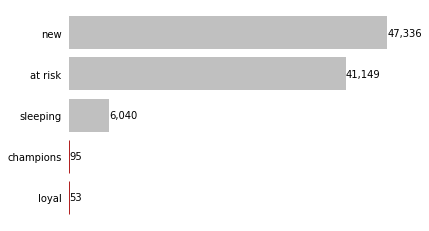

In [147]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,}'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [142]:
rfm.Segment.value_counts(normalize=True)

new          0.499995
at risk      0.434643
sleeping     0.063799
champions    0.001003
loyal        0.000560
Name: Segment, dtype: float64

Почти 50% клиентов можно считать новенькими и только 0,1% являются чемпионами. Однако 41% клиентов находятся в зоне риска, т.е. потенциально их можно побудить к покупкам.